## Micky Mouse example to show basic functionality of MovingPandas

In [ ]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import urllib
import os
import numpy as np
import pandas as pd
from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
import movingpandas as mpd

import warnings
warnings.simplefilter("ignore")

Create a pandas *data.frame* with 4 points and a time stampe that wille be used as the index as well. Afterwards convert it to a *GeoDataFrame*, setting the coordinate reference system (here WGS84 (EPSG code 4326)). Next step is to convert this to a *trajectory* obect.

In [3]:
df = pd.DataFrame([
  {'geometry':Point(0,0), 't':datetime(2018,1,1,12,0,0)},
  {'geometry':Point(6,0), 't':datetime(2018,1,1,12,6,0)},
  {'geometry':Point(6,6), 't':datetime(2018,1,1,12,10,0)},
  {'geometry':Point(9,9), 't':datetime(2018,1,1,12,15,0)}
]).set_index('t')
geo_df = GeoDataFrame(df, crs=4326) # WGS84, geographic coordinates
toy_traj = mpd.Trajectory(geo_df, 1)
toy_traj.df

geometry
t                                           
2018-01-01 12:00:00  POINT (0.00000 0.00000)
2018-01-01 12:06:00  POINT (6.00000 0.00000)
2018-01-01 12:10:00  POINT (6.00000 6.00000)
2018-01-01 12:15:00  POINT (9.00000 9.00000)

Convert trajectory to linestring. The linestring will be plotted

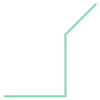

In [5]:
toy_traj.to_linestring()

Add speed information - will be calculated automatically.

In [6]:
toy_traj.add_speed(overwrite=True)
toy_traj.df

geometry        speed
t                                                        
2018-01-01 12:00:00  POINT (0.00000 0.00000)  1853.248777
2018-01-01 12:06:00  POINT (6.00000 0.00000)  1853.248777
2018-01-01 12:10:00  POINT (6.00000 6.00000)  2779.873166
2018-01-01 12:15:00  POINT (9.00000 9.00000)  1565.726761

Display speed of different line segments

<AxesSubplot:>

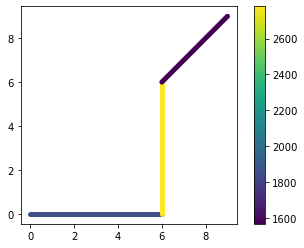

In [7]:
toy_traj.plot(column="speed", linewidth=5, capstyle='round', legend=True)

Which properties and methods are available from an Trjectory object?

In [8]:
dir(mpd.Trajectory)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_prev_pt',
 '_compute_distance',
 '_compute_heading',
 '_compute_speed',
 '_connect_prev_pt_and_geometry',
 '_get_df_with_speed',
 '_to_line_df',
 'add_direction',
 'add_speed',
 'apply_offset_minutes',
 'apply_offset_seconds',
 'clip',
 'copy',
 'get_bbox',
 'get_direction',
 'get_duration',
 'get_end_location',
 'get_end_time',
 'get_geom_column_name',
 'get_length',
 'get_linestring_between',
 'get_position_at',
 'get_row_at',
 'get_segment_between',
 'get_speed_column_name',
 'get_start_location',
 'get_start_time',
 'hvplot',
 'interpolate_position_at',
 'intersection',
 'intersects',
 'is_valid',
 '

In [9]:
help(mpd.Trajectory.get_position_at)

Help on function get_position_at in module movingpandas.trajectory:

get_position_at(self, t, method='interpolated')
    Compute and return position at time t.
    
    Parameters
    ----------
    t : datetime.datetime
        Timestamp to extract a row for
    method : str
        Interpolation method
    
    Returns
    -------
    shapely Point
        Position at time t
    
    Examples
    --------
    If the trajectory contains a position at the given timestamp, it is returned:
    
    >>> traj.get_position_at(datetime(2018, 1, 1, 12, 6))
    Point (6 0)
    
    If there is no trajectory position for the given timestamp, the default behaviour is to interpolate the location:
    
    >>> traj.get_position_at(datetime(2018, 1, 1, 12, 9))
    POINT (6 4.5)
    
    To get the trajectory position closest to the given timestamp, specify method='nearest':
    
    >>> traj.get_position_at(datetime(2018, 1, 1, 12, 9), method='nearest')
    POINT (6 6)



Wo befindet sich ein Object zu einem bestimmtem Zeitpunkt? Get object and string representation.

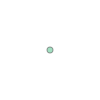

In [10]:
toy_traj.get_position_at(datetime(2018,1,1,12,6,0), method="nearest")    

In [11]:
print(toy_traj.get_position_at(datetime(2018,1,1,12,6,0), method="nearest"))

POINT (6 0)


There are different ways of getting information for time stamps for which we have no recorded information.

In [12]:
print(toy_traj.get_position_at(datetime(2018,1,1,12,7,0), method="nearest"))
print(toy_traj.get_position_at(datetime(2018,1,1,12,7,0), method="interpolated"))
print(toy_traj.get_position_at(datetime(2018,1,1,12,7,0), method="ffill")) # from the previous row
print(toy_traj.get_position_at(datetime(2018,1,1,12,7,0), method="bfill")) # from the following row

POINT (6 0)
POINT (6 1.5)
POINT (6 0)
POINT (6 6)


Get segement instead of point on trajectory

In [13]:
segment = toy_traj.get_segment_between(datetime(2018,1,1,12,6,0),datetime(2018,1,1,12,12,0))
print(segment)

Trajectory 1_2018-01-01 12:06:00 (2018-01-01 12:06:00 to 2018-01-01 12:10:00) | Size: 2 | Length: 667169.6m
Bounds: (6.0, 0.0, 6.0, 6.0)
LINESTRING (6 0, 6 6)


Define an area of interest and use this to clip the trajectory object

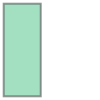

In [14]:
xmin, xmax, ymin, ymax = 2, 8, -10, 5
polygon = Polygon([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin), (xmin, ymin)])
polygon

In [16]:
intersections = toy_traj.clip(polygon)
print(intersections[0])

Trajectory 1_0 (2018-01-01 12:02:00 to 2018-01-01 12:09:20) | Size: 3 | Length: 1000754.3m
Bounds: (2.0, 0.0, 6.0, 5.0)
LINESTRING (2 0, 6 0, 6 5)


<AxesSubplot:>

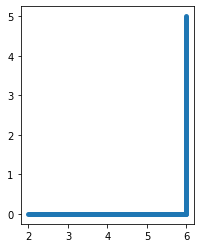

In [17]:
intersections[0].plot(linewidth=5, capstyle='round')